Topic:        Challenge Set 03
Subject:      Pandas (Exploring and visualizing our scraped movie data in pandas)
Date:         07/14/2018
Name:         AJ Davis
Worked with:  None
Location:     sf18_ds11/student_submissions/challenges/03-pandas/aj_pandas/ch_set_3_AJ.ipynb

In [29]:
import sys
print("Python Version:", sys.version)
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import dfply
import seaborn as sns

%matplotlib inline

Python Version: 3.6.5 |Anaconda custom (64-bit)| (default, Apr 26 2018, 08:42:37) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


### Challenge 1

In [5]:
# Import Data
df = pd.read_csv('challenges_data/2013_movies.csv')
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


Plot domestic total gross over time.

In [7]:
df.dtypes
# Convert ReleaseDate to datetime type
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])

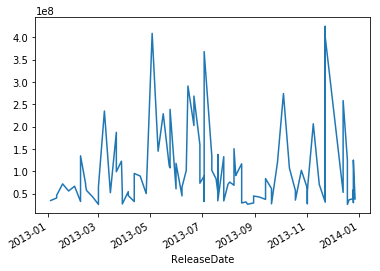

In [14]:
df.set_index('ReleaseDate', drop=True, inplace=True)
df['DomesticTotalGross'].astype(float).plot.line()

### Challenge 2

Plot runtime vs. domestic total gross.

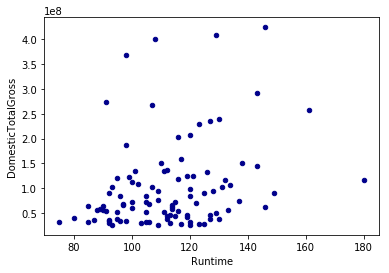

In [20]:
# plt.scatter(df.loc['Runtime', df.loc['DomesticTotalGross'], alpha=.2);
df.plot.scatter(x='Runtime', y='DomesticTotalGross', c='DarkBlue')

### Challenge 3

Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.

In [25]:
rating_group = df.groupby('Rating')

In [26]:
rating_group['Runtime', 'DomesticTotalGross'] .agg(np.mean)

,Runtime,DomesticTotalGross
Rating,,
G,107.000000,2.684928e+08
PG,99.933333,1.311357e+08
PG-13,117.510638,1.114498e+08
R,110.729730,6.989243e+07


### Challenge 4

Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.

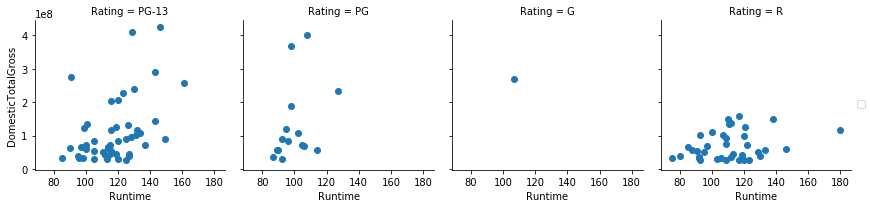

In [31]:
pal= dict(M='blue',F='red')
g = sns.FacetGrid(df, col='Rating', palette=pal,hue_order=['M','F'], col_wrap=4)
g = (g.map(plt.scatter,'Runtime','DomesticTotalGross').add_legend())

### Challenge 5

What director in your dataset has the highest gross per movie?

In [33]:
director_group = df.groupby('Director')

In [37]:
director_group['DomesticTotalGross'] .agg(np.mean).sort_values(ascending = False)

#Francis Lawrence              424668047

Director
Francis Lawrence              424668047
Shane Black                   409013994
Chris BuckJennifer Lee        400738009
Pierre CoffinChris Renaud     368061265
Zack Snyder                   291045518
Alfonso Cuaron                274092705
Dan Scanlon                   268492764
Peter Jackson                 258366855
Justin Lin                    238679850
Sam Raimi                     234911825
J.J. Abrams                   228778661
Alan Taylor                   206362140
Marc Forster                  202359711
Kirk De MiccoChris Sanders    187168425
Paul Feig                     159582188
Rawson Marshall Thurber       150394119
David O. Russell              150117807
Baz Luhrmann                  144840419
Seth Gordon                   134506920
Dennis Dugan                  133668525
James Mangold                 132556852
Adam McKay                    125168368
Peter Berg                    125095601
Jon Chu                       122523060
Louis Leterrier               1

### Challenge 6

Bin your dataset into months and make a bar graph of the mean domestic total gross by month. Error bars will represent the standard error of the mean.

Title of graph should include: Mean Domestic Total Gross by Month in 2013

Topic for consideration: what is the correct formula for the standard error of the mean? Examine the error bars and see if they are "reasonable."

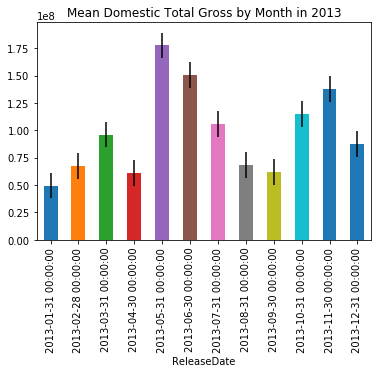

In [46]:
err = df['DomesticTotalGross'].resample('M').apply(np.mean).sem()
df['DomesticTotalGross'].resample('M').apply(np.mean).plot.bar(title='Mean Domestic Total Gross by Month in 2013', yerr=err)